## 一、python flask 主程式

### 備註: 由於沒有可以用 GPIO 控制的風扇，因此改為利用 GPIO 控制 LED

In [ ]:
from flask import Flask, render_template, request
import RPi.GPIO as GPIO

app = Flask(__name__)

@app.route("/", methods=['GET'])
def main_index(): 
  return render_template('index.html')

@app.route("/LED_ON", methods=['POST'])
def LED_ON():
    led_pin = 23
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(led_pin, GPIO.OUT)
    GPIO.output(led_pin, 1)
    
    return "LED 開啟"
    

@app.route("/LED_OFF", methods=['POST'])
def LED_OFF():
    led_pin = 23
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(led_pin, GPIO.OUT)
    GPIO.output(led_pin, 0)
    
    return "LED 關閉"
    
if __name__ == "__main__":
	app.run(host='0.0.0.0', port=8080, debug=True, threaded=True)

## 二、index.html

```
<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<meta name="viewport" content="width=device-width, initial-scale=1.0">
	<title>Document</title>
</head>
<body>
	<form action = "LED_ON" method = "POST" enctype = "multipart/form-data">
        <input type = "submit" value="燈亮"/>
    </form>
	<form action = "LED_OFF" method = "POST" enctype = "multipart/form-data"> 
        <input type = "submit" value="燈滅"/>
    </form>
</body>
</html>
```

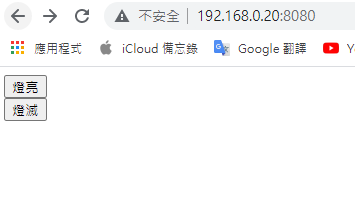

## 三、在樹莓派上運行 flask

```
root@raspberrypi:/home/pi/flask# python3 flask_test.py
 * Serving Flask app "flask_test" (lazy loading)
 * Environment: production
   WARNING: Do not use the development server in a production environment.
   Use a production WSGI server instead.
 * Debug mode: on
 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 312-597-025
flask_test.py:14: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(led_pin, GPIO.OUT)
192.168.0.13 - - [15/Jul/2021 16:40:36] "POST /LED_ON HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:40:38] "POST /LED_OFF HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:40:40] "POST /LED_ON HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:40:41] "POST /LED_OFF HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:40:49] "POST /LED_ON HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:40:51] "POST /LED_OFF HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:41:01] "POST /LED_OFF HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:41:03] "POST /LED_ON HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:41:04] "POST /LED_OFF HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:41:05] "POST /LED_ON HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:41:06] "POST /LED_OFF HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:41:07] "POST /LED_ON HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:41:08] "POST /LED_OFF HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:41:09] "POST /LED_ON HTTP/1.1" 200 -
192.168.0.13 - - [15/Jul/2021 16:41:11] "POST /LED_OFF HTTP/1.1" 200 -
root@raspberrypi:/home/pi/flask#
```